# Бустинг
1. Выполните классификацию набора данных из задания о Байесовской классификации с помощью бустинга, варьируя количество участников ансамбля (от 50 до 100 с шагом 10).
2. Вычислите показатели качества классификации: аккуратность (accuracy), точность (precision), полнота (recall), F-мера. Выполните визуализацию полученных результатов в виде диаграмм. Нанесите на диаграммы соответствующие значения, полученные в заданиях о Байесовской классификации, деревьях решений, бэггинге и случайном лесе.
3. Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
    - формулировка задания; 
    - гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами;
    - рисунки с результатами визуализации; 
    - пояснения, раскрывающие смысл полученных результатов.

In [1]:
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.base import BaseEstimator
from sklearn.datasets import load_breast_cancer

plt.style.use("seaborn-v0_8")
RANDOM_STATE = 17
test_sizes = np.arange(0.1, 0.4, 0.05)
X, y = load_breast_cancer(return_X_y=True)

def evaluate_metrics(y_pred: np.array, y_test: np.array) -> Dict[str, float]:
    return {
        "accuracy_score": accuracy_score(y_test, y_pred),
        "precision_score": precision_score(y_test, y_pred),
        "recall_score": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
    }

def fit_predict_estimators(estimators: Dict[str, BaseEstimator], X: np.array, y: np.array, test_sizes: np.array):
    results = {}
    
    for estimator_name, estimator in estimators.items():
        accuracy_score_list = []
        precision_score_list = []
        recall_score_list = []
        f1_score_list = []

        for test_size in test_sizes:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)
            estimator.fit(X_train, y_train)
            y_pred = estimator.predict(X_test)
            metrics = evaluate_metrics(y_pred=y_pred, y_test=y_test)
            
            accuracy_score_list.append(metrics["accuracy_score"])
            precision_score_list.append(metrics["precision_score"])
            recall_score_list.append(metrics["recall_score"])
            f1_score_list.append(metrics["f1_score"])

        results[estimator_name] = {
            "test_sizes": test_sizes,
            "accuracy_score": accuracy_score_list, 
            "precision_score": precision_score_list, 
            "recall_score": recall_score_list, 
            "f1_score": f1_score_list,
        }

    return results

def plot_metrics(results, figsize=(15, 10)):
    fig, axs = plt.subplots(len(results), 1, figsize = figsize, squeeze=False)

    for i, estimator_name in enumerate(results.keys()):
        axs[i][0].plot(test_sizes, results[estimator_name]["accuracy_score"])
        axs[i][0].plot(test_sizes, results[estimator_name]["precision_score"])
        axs[i][0].plot(test_sizes, results[estimator_name]["recall_score"])
        axs[i][0].plot(test_sizes, results[estimator_name]["f1_score"])

        axs[i][0].set_title(estimator_name)
        axs[i][0].grid(visible=True)
        axs[i][0].legend(["accuracy_score", "precision_score", "recall_score", "f1_score"])
    
    fig.savefig('charts.png')
    plt.show()

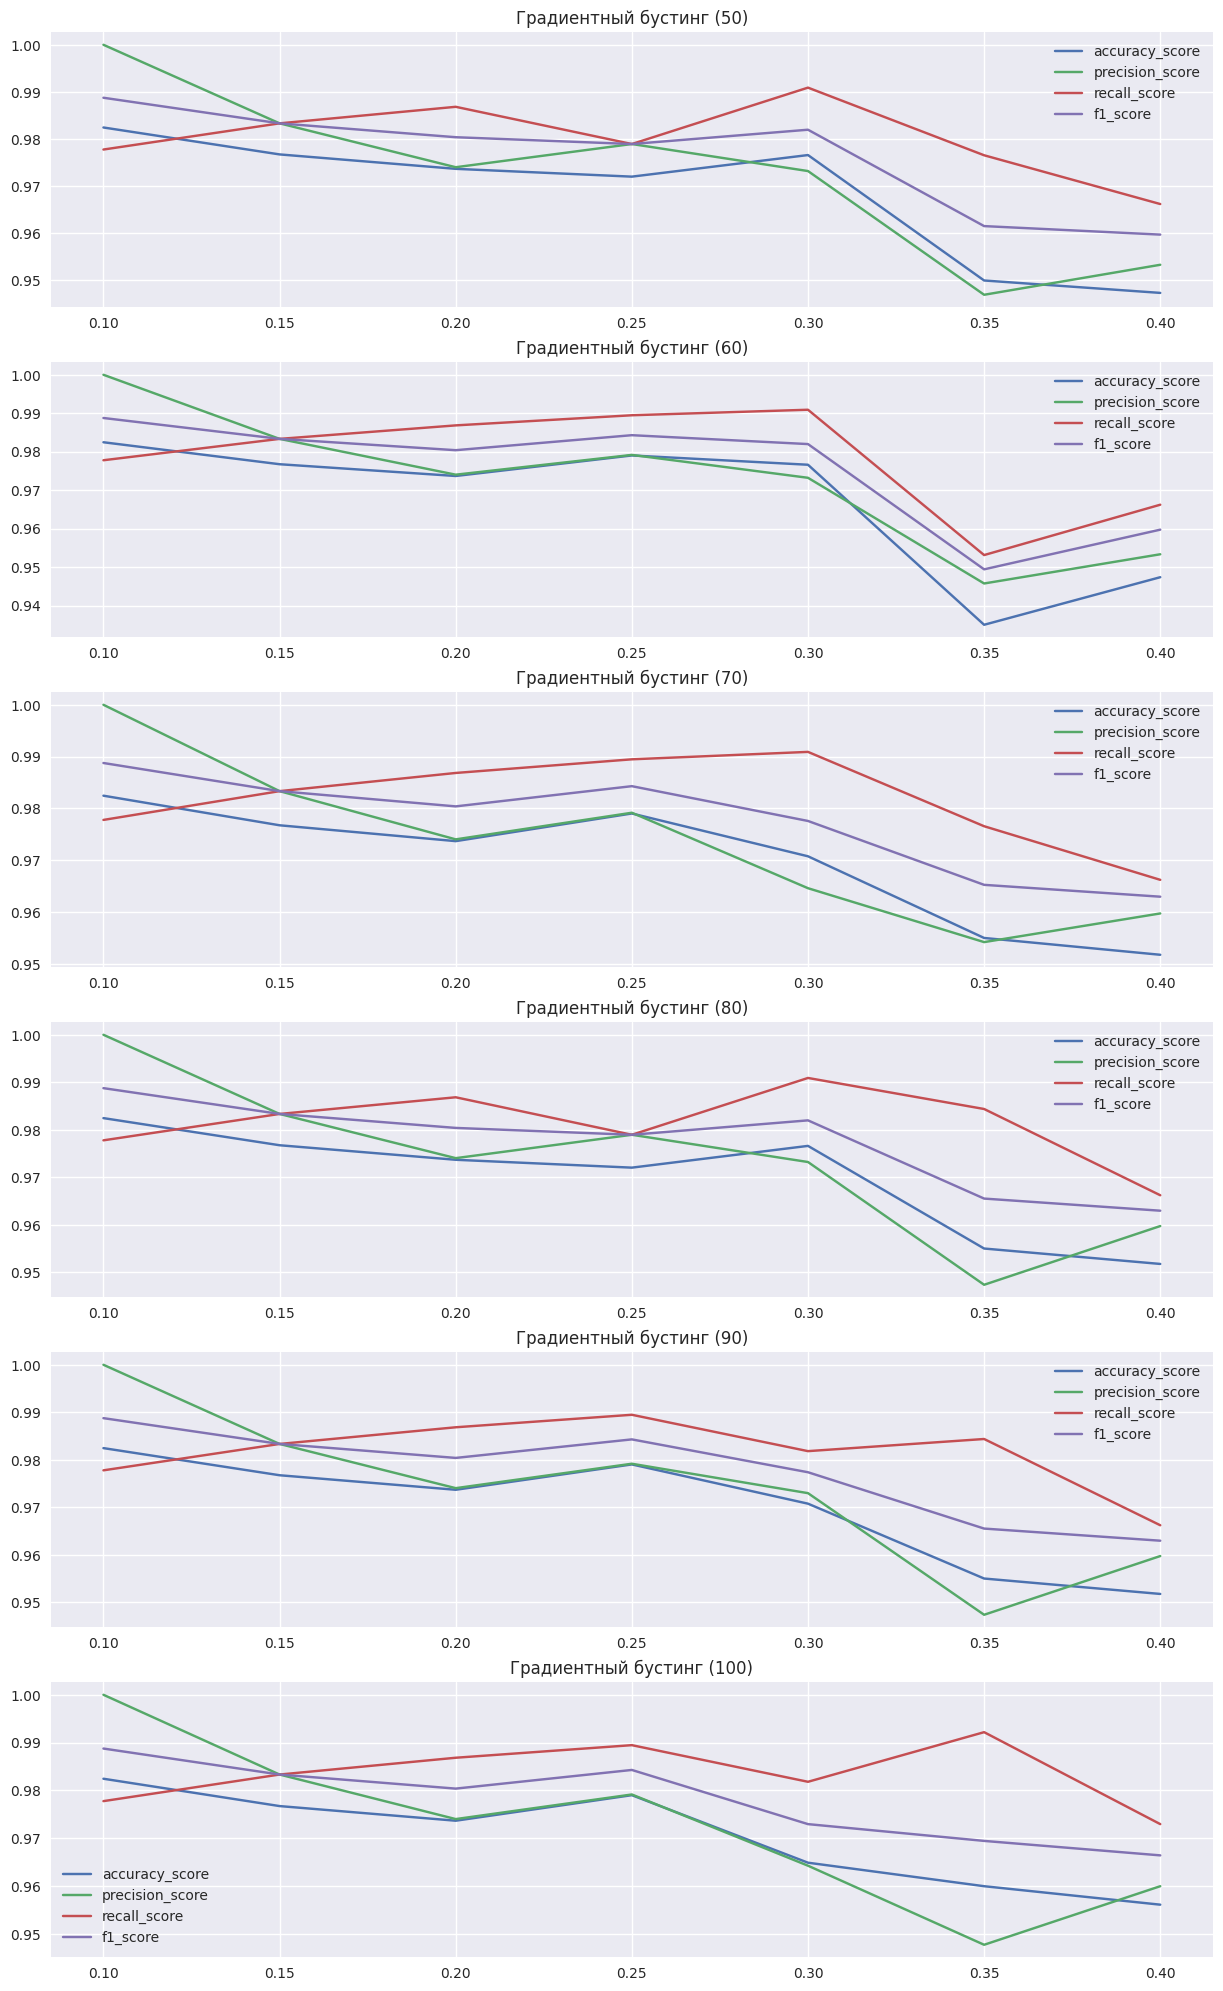

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

n_trees = np.arange(50, 101, 10)
estimators = {f"Градиентный бустинг ({n})": GradientBoostingClassifier(n_estimators=n) for n in n_trees}
results = fit_predict_estimators(estimators, X, y, test_sizes)

plot_metrics(results, figsize=(15, 25))